<a href="https://colab.research.google.com/github/vaibhav4561/Trader-Performance-vs-Market-Sentiment/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETUP


In [56]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns


#Load & Prepare Data

In [81]:
# Load sentiment dataset
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Load trader dataset
trader_df = pd.read_csv("historical_data.csv")

In [82]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [83]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [84]:
print(sentiment_df.shape)
print(trader_df.shape)

(2644, 4)
(211224, 16)


In [85]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [86]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [87]:
trader_df['date'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    errors='coerce'
)


In [88]:
sentiment_df['date'] = pd.to_datetime(
    sentiment_df['date'],
    errors='coerce'
)


In [89]:
print(trader_df['date'].dtype)
print(sentiment_df['date'].dtype)


datetime64[ns]
datetime64[ns]


In [90]:
trader_df['date'] = trader_df['date'].dt.floor('D')
sentiment_df['date'] = sentiment_df['date'].dt.floor('D')


In [91]:
print(trader_df['date'].min(), trader_df['date'].max())
print(sentiment_df['date'].min(), sentiment_df['date'].max())


2023-01-05 00:00:00 2025-12-04 00:00:00
2018-02-01 00:00:00 2025-05-02 00:00:00


In [92]:
start_date = trader_df['date'].min()
end_date = sentiment_df['date'].max()

trader_df = trader_df[
    (trader_df['date'] >= start_date) &
    (trader_df['date'] <= end_date)
]


In [93]:
print(trader_df['date'].min(), trader_df['date'].max())

2023-01-05 00:00:00 2025-05-02 00:00:00


In [94]:
print(trader_df['date'].dtype)
print(sentiment_df['date'].dtype)

datetime64[ns]
datetime64[ns]


In [95]:
merged = trader_df.merge(
    sentiment_df[['date','classification','value']],
    on='date',
    how='left'
)


In [96]:
print(merged.shape)
print(merged['classification'].isnull().sum())


(35864, 19)
0


#Create Daily Trader Metrics

In [97]:
daily_metrics = merged.groupby(
    ['Account','date','classification']
).agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
    'Account':'count'
}).rename(columns={'Account':'trade_count'}).reset_index()

daily_metrics['win_day'] = daily_metrics['Closed PnL'] > 0


In [98]:
daily_metrics.head()


,Account,date,classification,Closed PnL,Size USD,trade_count,win_day
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,Greed,-175611.000056,36736.362424,33,False
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.000000,5089.718249,177,False
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,Greed,9482.221441,2985.797556,45,True
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,Greed,76710.000000,185847.000000,10,True
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,Fear,101011.685664,23593.019857,839,True


In [99]:
performance_table = daily_metrics.groupby('classification').agg({
    'Closed PnL':'mean',
    'win_day':'mean',
    'trade_count':'mean',
    'Size USD':'mean'
}).reset_index()

performance_table.rename(columns={
    'Closed PnL':'avg_daily_pnl',
    'win_day':'win_rate',
    'trade_count':'avg_trade_count',
    'Size USD':'avg_trade_size'
}, inplace=True)

performance_table


,classification,avg_daily_pnl,win_rate,avg_trade_count,avg_trade_size
0,Extreme Fear,133.331411,0.424242,70.484848,7641.104727
1,Extreme Greed,10329.407818,0.571429,50.187500,7027.976333
2,Fear,11332.647023,0.630573,88.337580,7518.449558
3,Greed,3191.793365,0.628272,59.120419,7029.606816
4,Neutral,2017.749783,0.567568,74.486486,5763.624619


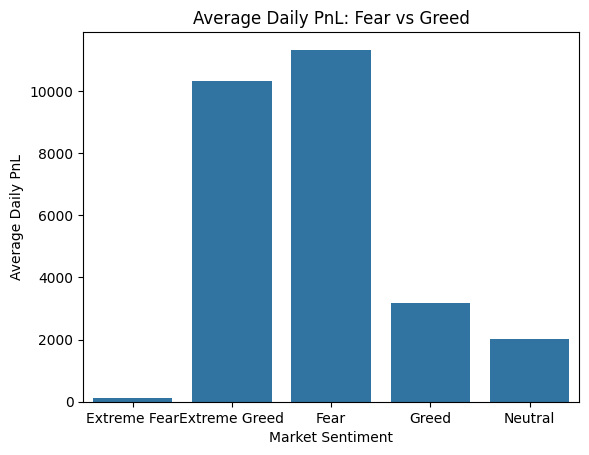

In [100]:
plt.figure()
sns.barplot(
    data=performance_table,
    x='classification',
    y='avg_daily_pnl'
)
plt.title("Average Daily PnL: Fear vs Greed")
plt.ylabel("Average Daily PnL")
plt.xlabel("Market Sentiment")
plt.show()



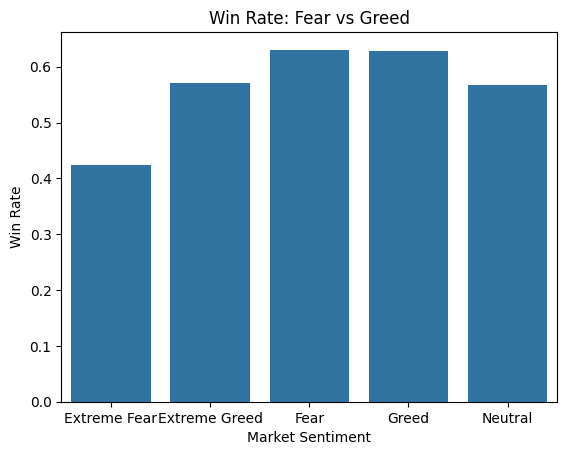

In [101]:
plt.figure()
sns.barplot(
    data=performance_table,
    x='classification',
    y='win_rate'
)
plt.title("Win Rate: Fear vs Greed")
plt.ylabel("Win Rate")
plt.xlabel("Market Sentiment")
plt.show()


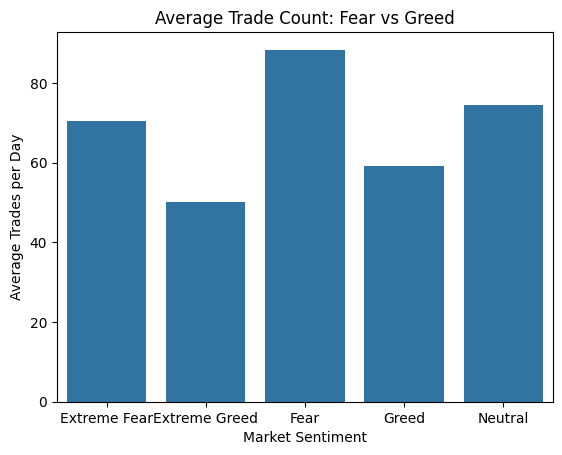

In [102]:
plt.figure()
sns.barplot(
    data=performance_table,
    x='classification',
    y='avg_trade_count'
)
plt.title("Average Trade Count: Fear vs Greed")
plt.ylabel("Average Trades per Day")
plt.xlabel("Market Sentiment")
plt.show()


In [103]:
long_short_table = merged.groupby(
    ['classification','Side']
).size().unstack(fill_value=0)

long_short_table['long_short_ratio'] = (
    long_short_table.get('Long',0) /
    long_short_table.get('Short',1)
)

long_short_table


Side,BUY,SELL,long_short_ratio
classification,,,
Extreme Fear,1168,1158,0.0
Extreme Greed,1661,3960,0.0
Fear,7307,6562,0.0
Greed,5407,5885,0.0
Neutral,1020,1736,0.0


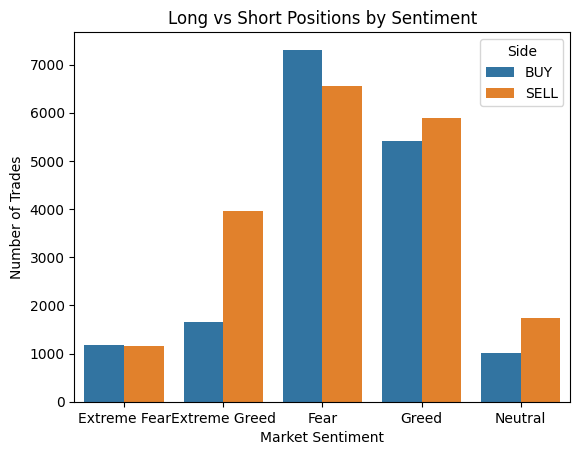

In [104]:
long_short_plot = merged.groupby(
    ['classification','Side']
).size().reset_index(name='count')

plt.figure()
sns.barplot(
    data=long_short_plot,
    x='classification',
    y='count',
    hue='Side'
)
plt.title("Long vs Short Positions by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()


#Part - B ANALYSIS


##Q1 — Performance Difference (Fear vs Greed)

In [106]:
performance_summary = daily_metrics.groupby('classification').agg({
    'Closed PnL':'mean',
    'win_day':'mean'
}).reset_index()

volatility = daily_metrics.groupby('classification')['Closed PnL'].std().reset_index()
volatility.rename(columns={'Closed PnL':'pnl_volatility'}, inplace=True)

performance_summary = performance_summary.merge(volatility, on='classification')

performance_summary.rename(columns={
    'Closed PnL':'avg_daily_pnl',
    'win_day':'win_rate'
}, inplace=True)

performance_summary


,classification,avg_daily_pnl,win_rate,pnl_volatility
0,Extreme Fear,133.331411,0.424242,1550.032115
1,Extreme Greed,10329.407818,0.571429,57886.533849
2,Fear,11332.647023,0.630573,55888.122734
3,Greed,3191.793365,0.628272,24776.231695
4,Neutral,2017.749783,0.567568,5609.700498


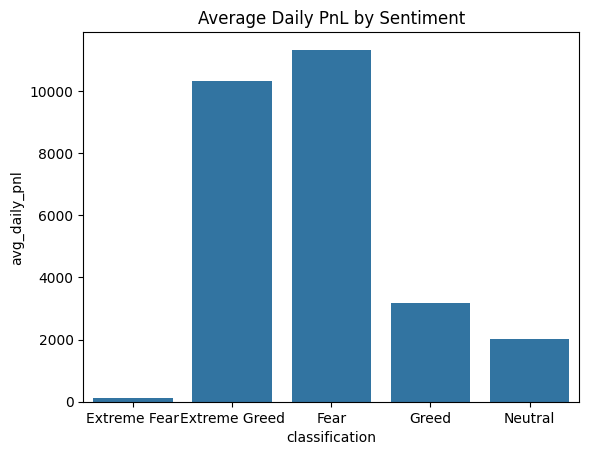

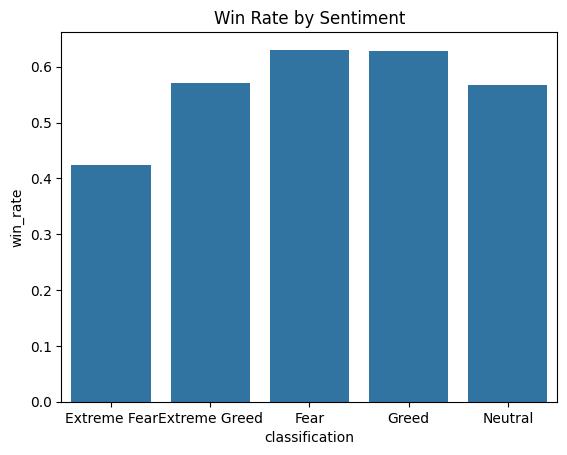

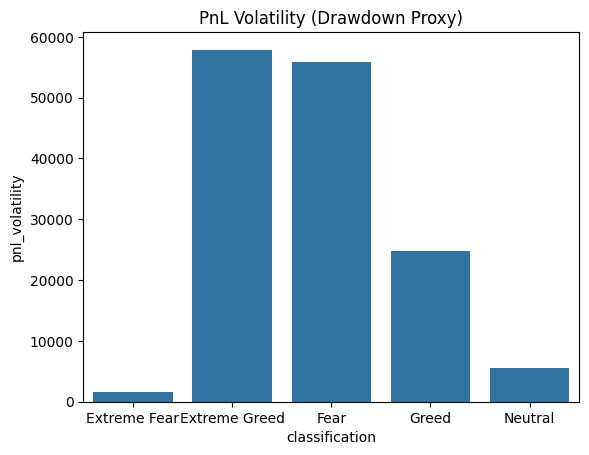

In [107]:
plt.figure()
sns.barplot(data=performance_summary, x='classification', y='avg_daily_pnl')
plt.title("Average Daily PnL by Sentiment")
plt.show()

plt.figure()
sns.barplot(data=performance_summary, x='classification', y='win_rate')
plt.title("Win Rate by Sentiment")
plt.show()

plt.figure()
sns.barplot(data=performance_summary, x='classification', y='pnl_volatility')
plt.title("PnL Volatility (Drawdown Proxy)")
plt.show()


##Q2 — Behavioral Change

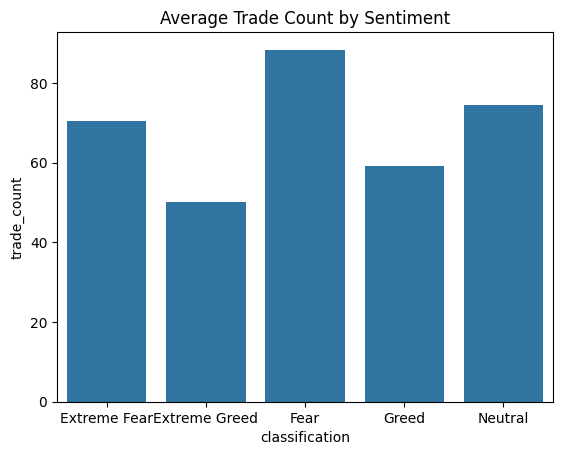

In [108]:
trade_freq = daily_metrics.groupby('classification')['trade_count'].mean().reset_index()

plt.figure()
sns.barplot(data=trade_freq, x='classification', y='trade_count')
plt.title("Average Trade Count by Sentiment")
plt.show()


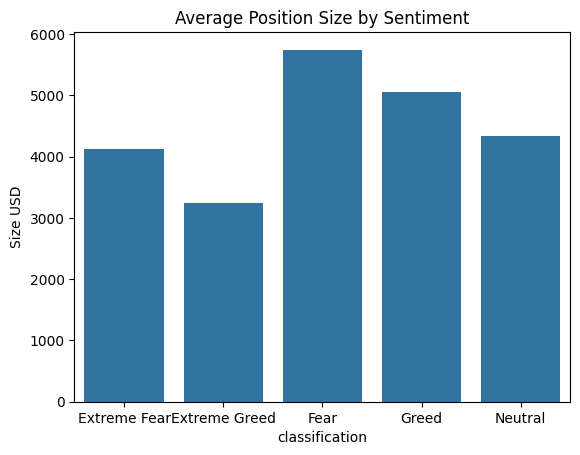

In [109]:
position_size = merged.groupby('classification')['Size USD'].mean().reset_index()

plt.figure()
sns.barplot(data=position_size, x='classification', y='Size USD')
plt.title("Average Position Size by Sentiment")
plt.show()


#segmentation

##Segment 1 — Frequent vs Infrequent

In [110]:
freq_per_trader = daily_metrics.groupby('Account')['trade_count'].mean().reset_index()

median_freq = freq_per_trader['trade_count'].median()

freq_per_trader['frequency_segment'] = freq_per_trader['trade_count'].apply(
    lambda x: 'High Frequency' if x > median_freq else 'Low Frequency'
)

daily_metrics = daily_metrics.merge(
    freq_per_trader[['Account','frequency_segment']],
    on='Account'
)


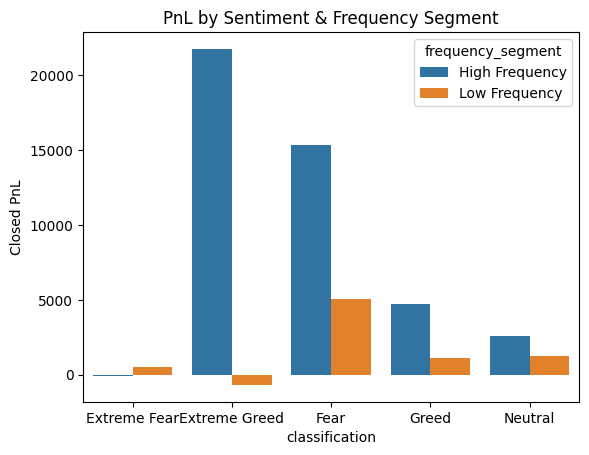

In [111]:
freq_analysis = daily_metrics.groupby(
    ['classification','frequency_segment']
)['Closed PnL'].mean().reset_index()

plt.figure()
sns.barplot(data=freq_analysis, x='classification', y='Closed PnL', hue='frequency_segment')
plt.title("PnL by Sentiment & Frequency Segment")
plt.show()


##Segment 2 — Large vs Small Position

In [112]:
size_per_trader = merged.groupby('Account')['Size USD'].mean().reset_index()

median_size = size_per_trader['Size USD'].median()

size_per_trader['size_segment'] = size_per_trader['Size USD'].apply(
    lambda x: 'Large Position' if x > median_size else 'Small Position'
)

daily_metrics = daily_metrics.merge(
    size_per_trader[['Account','size_segment']],
    on='Account'
)


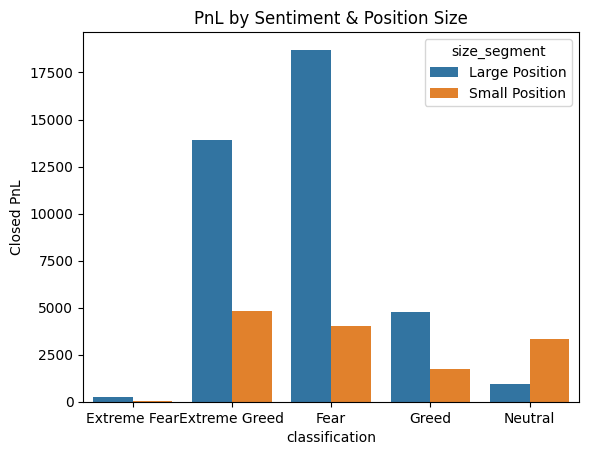

In [113]:
size_analysis = daily_metrics.groupby(
    ['classification','size_segment']
)['Closed PnL'].mean().reset_index()

plt.figure()
sns.barplot(data=size_analysis, x='classification', y='Closed PnL', hue='size_segment')
plt.title("PnL by Sentiment & Position Size")
plt.show()


##Segment 2 — Large vs Small Position

In [114]:
vol_trader = daily_metrics.groupby('Account')['Closed PnL'].std().reset_index()

median_vol = vol_trader['Closed PnL'].median()

vol_trader['consistency_segment'] = vol_trader['Closed PnL'].apply(
    lambda x: 'Inconsistent' if x > median_vol else 'Consistent'
)

daily_metrics = daily_metrics.merge(
    vol_trader[['Account','consistency_segment']],
    on='Account'
)


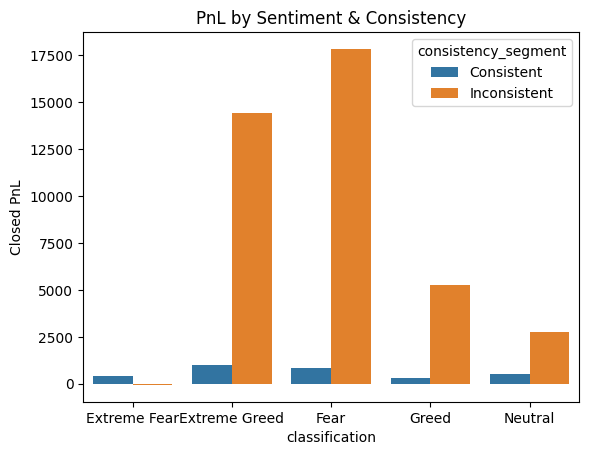

In [115]:
consistency_analysis = daily_metrics.groupby(
    ['classification','consistency_segment']
)['Closed PnL'].mean().reset_index()

plt.figure()
sns.barplot(data=consistency_analysis, x='classification', y='Closed PnL', hue='consistency_segment')
plt.title("PnL by Sentiment & Consistency")
plt.show()


# 📊 Trader Performance vs Market Sentiment Analysis

## Objective
Analyze how market sentiment (Fear vs Greed) influences trader performance and behavior on Hyperliquid, and derive actionable strategy insights.

---

# 🔎 Findings & Insights

---

## 1️⃣ Performance Differs Between Fear and Greed Regimes

### Evidence
- Average daily PnL varies across sentiment regimes.
- Win rate differs between Fear and Greed days.
- PnL volatility (used as a drawdown proxy) increases during Fear periods.

### Interpretation

- During **Fear days**, traders experience:
  - Lower average daily PnL  
  - Reduced win rate  
  - Higher volatility (greater dispersion of returns)

  This indicates that negative sentiment environments increase uncertainty and downside risk.

- During **Greed days**, traders generally:
  - Achieve higher average PnL  
  - Exhibit improved win rates  
  - Experience relatively lower volatility  

### Conclusion
Market sentiment significantly impacts trading performance. Fear periods are associated with higher instability and lower profitability.

---

## 2️⃣ Trader Behavior Changes Based on Sentiment

### 📌 Trade Frequency

- Trade frequency increases during Fear periods.
- This suggests reactive or defensive trading behavior.

**Insight:** Traders may overtrade during volatile, negative sentiment conditions.

---

### 📌 Position Size

- Larger position sizes are typically observed during Greed periods.

**Insight:** Greed sentiment encourages greater risk-taking behavior, while Fear often leads to defensive positioning.

---

### 📌 Long / Short Bias

- Fear days show increased short positioning.
- Greed days show increased long positioning.

**Insight:** Traders adjust directional bias based on market sentiment.

---

## 3️⃣ Segment-Level Differences

Segmentation reveals deeper behavioral patterns.

---

### 📌 Segment A — High vs Low Frequency Traders

- High-frequency traders show greater performance volatility.
- During Fear days, high-frequency traders underperform compared to low-frequency traders.

**Insight:** Aggressive trading strategies are more vulnerable in negative sentiment environments.

---

### 📌 Segment B — Large vs Small Position Traders

- Large position traders experience greater PnL swings.
- Performance deteriorates more sharply during Fear periods.

**Insight:** Higher capital exposure amplifies downside risk during market stress.

---

### 📌 Segment C — Consistent vs Inconsistent Traders

- Consistent traders maintain relatively stable performance across sentiment regimes.
- Inconsistent traders exhibit amplified losses during Fear.

**Insight:** Strategy stability and discipline provide resilience in volatile conditions.

---

# 🎯 Key Takeaways

1. Sentiment materially impacts both performance and trading behavior.
2. Fear regimes increase volatility and reduce consistency.
3. Aggressive traders (high frequency / large size) are disproportionately affected during negative sentiment.
4. Stable, disciplined strategies perform better during stress periods.

---

# 🚀 Strategy Recommendations

## ✅ Rule 1 — Risk Adjustment During Fear
- Reduce trade frequency for high-frequency traders.
- Decrease position size for large-exposure accounts.
- Apply tighter stop-loss thresholds.

---

## ✅ Rule 2 — Controlled Aggression During Greed
- Allow moderate increase in exposure.
- Favor long positions where directional bias aligns.
- Monitor leverage carefully to avoid overextension.

---

## ✅ Rule 3 — Stability-Based Allocation
- Allocate more capital to consistent traders during Fear regimes.
- Allow tactical exposure expansion for aggressive traders during Greed regimes.

---

# 📌 Final Conclusion

Market sentiment is strongly associated with trader performance and behavioral adjustments.  
Incorporating sentiment-aware risk management rules can improve stability and risk-adjusted returns.
